# 선형회귀 모델 작성, 예측, 평가

LinearRegressor & RandomForestRegressor()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
p_df = pd.read_csv('data1/premium.csv')
p_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
temp = []
smk = []
for i in range(len(p_df)):
  if p_df.iloc[i]['sex'] == 'female':
    temp.append(1)
  elif p_df.iloc[i]['sex'] == 'male':
    temp.append(0)
  if p_df.iloc[i]['smoker'] == 'yes':
    smk.append(1)
  else:
    smk.append(0)
p_df = p_df.drop(['sex','region','smoker'],axis = 1)
p_df['sex'] = temp
p_df['smoker'] = smk
p_df.head()

,age,bmi,children,charges,sex,smoker
0,19,27.900,0,16884.92400,1,1
1,18,33.770,1,1725.55230,0,0
2,28,33.000,3,4449.46200,0,0
3,33,22.705,0,21984.47061,0,0
4,32,28.880,0,3866.85520,0,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x = p_df.drop('charges', axis=1)
y = p_df['charges']

x = x.dropna()
y = y[x.index] 

# 스케일링
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)




In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=200)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred[:3]

array([10745.76962249,  2414.15350525,  4934.05715697])

In [8]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse, mse

(np.float64(6104.3777967581555), np.float64(37263428.28555395))

In [9]:
# 결정계수
r2_score(y_test, y_pred)

np.float64(0.7196005638854126)

RMSE:187.51 , MSE:35161.70 , r2 Score:0.76

In [10]:
lr.intercept_, lr.coef_

(np.float64(-2562.972294235753),
 array([11517.23829023, 12255.0880318 ,  2756.2957245 ,   447.62415406,
        24075.98323099]))

In [11]:
np.round(lr.intercept_, 1), np.round(lr.coef_, 1)

(np.float64(-2563.0), array([11517.2, 12255.1,  2756.3,   447.6, 24076. ]))

In [12]:
pd.Series(data=np.round(lr.coef_,1), 
          index=p_df.drop('charges', axis=1).columns).sort_values(ascending=False)

smoker      24076.0
bmi         12255.1
age         11517.2
children     2756.3
sex           447.6
dtype: float64

In [13]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr, x, y, scoring='neg_mean_squared_error', cv=5)
neg_mse_scores

array([-37127841.75484183, -37721177.69037101, -32390793.90669908,
       -39986662.08703455, -37121655.85848469])

In [14]:
# MSE, RMSE
RMSE = np.sqrt(neg_mse_scores*-1)
np.mean(RMSE), RMSE

(np.float64(6068.513019063014),
 array([6093.26199624, 6141.75688955, 5691.29105798, 6323.50077782,
        6092.75437372]))

In [15]:
# R2
r2_scores = cross_val_score(lr, x, y, scoring='r2', cv=5)
np.mean(r2_scores),r2_scores

(np.float64(0.7436350118092281),
 array([0.75803068, 0.69318664, 0.77993478, 0.73050951, 0.75651345]))

오차 (187 → 190 ) , 결정계수 (0.76  → 0.75)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

rf_clf = RandomForestRegressor(random_state=0, max_depth=8)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)

mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.5f}, MSE: {mse} ')

RMSE: 4690.02071, MSE: 21996294.275136456 


In [17]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, rf_pred)
print(f'MAE: {mae:.5f}')

MAE: 2536.01354


In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, rf_pred)
print(f'r2 Score: {r2:.5f}')

r2 Score: 0.83448


In [19]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(rf_clf, x, y, scoring='neg_mean_squared_error', cv=5)
neg_mse_scores

array([-21460183.79899808, -27950375.52412088, -18487081.15986106,
       -25487950.16767381, -22439639.69452644])

# Linear회귀 모델

RMSE:187.51 , MSE:35161.70 , r2 Score:0.76

# RandomForest회귀 모델

RMSE: 172.99748 ,  MAE: 90.59522 ,  r2 Score: 0.80257

# cv

# 다항회귀

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=200)
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('Linear', LinearRegression())]
)
model_poly.fit(x_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('Linear', LinearRegression())])

In [22]:
pred_poly = model_poly.predict(x_test)
mean_squared_error(y_test, pred_poly)

np.float64(22738484.11932638)

In [23]:
r2_score(y_test, pred_poly)

np.float64(0.8288977043040517)

In [27]:
results = []
for degree in range(1,5):
    model_poly = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear', LinearRegression())]
    )
    model_poly.fit(x_train, y_train)
    pred_poly = model_poly.predict(x_test)
    mse = mean_squared_error(y_test, pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred_poly)
    
    results.append({'degree': degree,
                    'MSE': mse,
                    'RMSE': rmse,
                    'R2': r2})
    
pd.DataFrame(results)

,degree,MSE,RMSE,R2
0,1,"37,263,428.29","6,104.38",0.72
1,2,"22,738,484.12","4,768.49",0.83
2,3,"23,085,758.56","4,804.76",0.83
3,4,"29,046,062.69","5,389.44",0.78


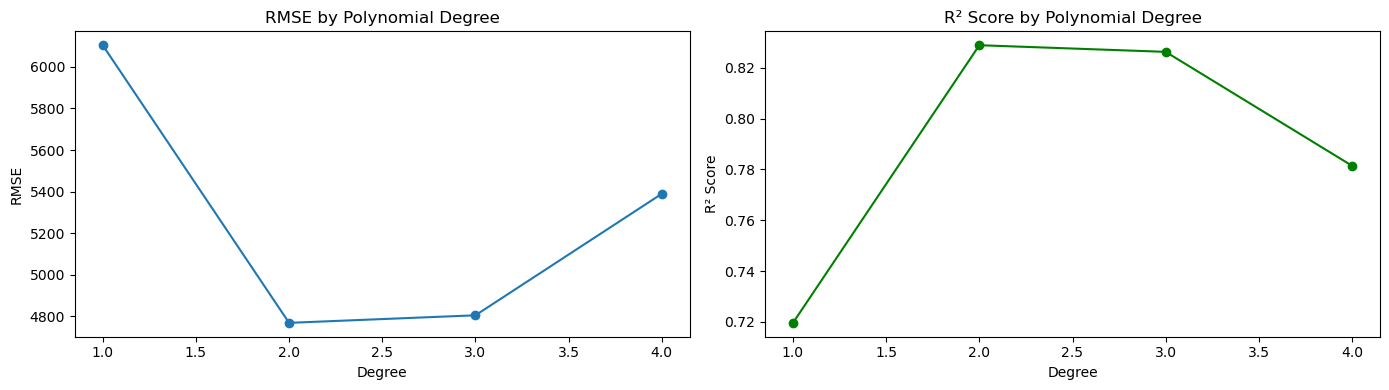

In [28]:
# 시각화
plt.figure(figsize=(14, 4))

# RMSE
plt.subplot(1, 2, 1)
plt.plot(df_result['degree'], df_result['RMSE'], marker='o')
plt.title('RMSE by Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('RMSE')

# R2
plt.subplot(1, 2, 2)
plt.plot(df_result['degree'], df_result['R2'], marker='o', color='green')
plt.title('R² Score by Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()